<b><font color= blue size =4>Lead Scoring - Case Study</font></b><br>
<b><font color = green>Problem Statement</font></b><br>
The company needs help identifying the leads that are more likely to be converted into paying customers. X Education has asked us to create a framework that will help it determine the lead score for each prospect. It will then assign a higher score to those who have a better chance of converting than others. The CEO of the company has stated that the company's goal is to have a lead conversion rate of 80%.

<b><font color = green >Goals of Case Study</font></b><br>

To identify the leads that are most likely to convert, the company needs to construct a logistic regression model that will give a lead score ranging from 0 to 100. A higher score means that the lead is more likely to convert, while a lower score means that it is less likely to do so.

<b><font color= red size =4> Importing Libraries and Data</font></b>

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Suppresssing warnings
import warnings
warnings.filterwarnings('ignore')

<b><font color= red size =4>Inspecting the Dataframe </font></b>

In [51]:
leads_df=pd.read_csv("/Users/uttam/Downloads/Lead Scoring Assignment/Leads.csv")
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [52]:
#Let's check the dimesions of the dataframe
leads_df.shape

(9240, 37)

In [53]:
#Statstical aspects of the dataframe
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [54]:
#Let's check out info of each column
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [55]:
#check for duplicates
sum(leads_df.duplicated(subset = 'Prospect ID')) == 0

True

In [56]:
#check for duplicates
sum(leads_df.duplicated(subset = 'Lead Number')) == 0

True

There are No duplicate values found in 'Prospect ID' and 'Lead Number'

## <font color=green>Exploratory Data Analysis</font>

### Data Cleaning


We can deduce that there are numerous select values for various columns. This arises from the fact that the customer failed to select any of the available options from the list. Consequently, the select values exhibited are as good as nil.

In [57]:
#dropping Lead Number and Prospect ID since they have all unique values

leads_df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace = True)

In [58]:
#Replacing 'Select' values with Nan
leads_df=leads_df.replace("Select", np.nan)

In [59]:
#Checking for count of missing values in each column
leads_df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [60]:
#checking percentage of null values in each column

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [61]:
#Drop all the columns with more than 35% missing values
cols=leads_df.columns

for i in cols:
    if((100*(leads_df[i].isnull().sum()/len(leads_df.index))) >= 35):
        leads_df.drop(i, axis=1, inplace = True)

In [62]:
#checking percentage of null values in each column after dropping columns with more than 45% missing values

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

We can then deduce that there are numerous columns with high percentages of null values. These will be discarded since they are not of use.

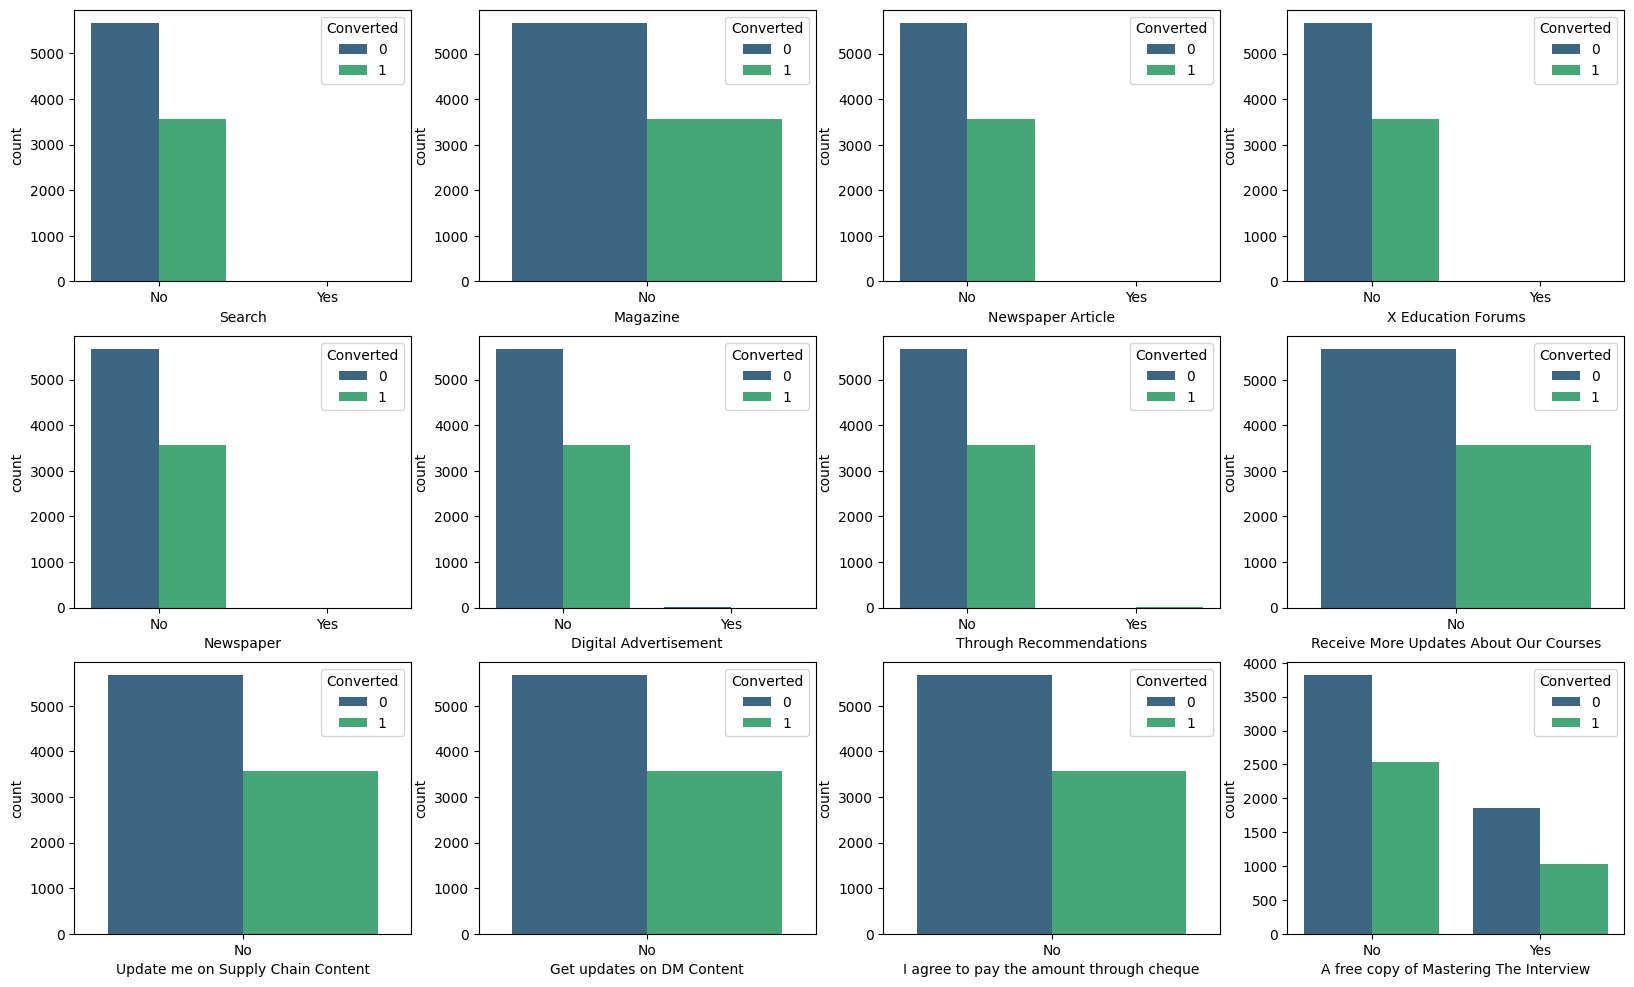

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming leads_df is your DataFrame

# Columns for which you want to create count plots
columns_to_plot = ["Search", "Magazine", "Newspaper Article", "X Education Forums",
                   "Newspaper", "Digital Advertisement", "Through Recommendations",
                   "Receive More Updates About Our Courses", "Update me on Supply Chain Content",
                   "Get updates on DM Content", "I agree to pay the amount through cheque",
                   "A free copy of Mastering The Interview"]

# Creating subplots dynamically
fig, axs = plt.subplots(3, 4, figsize=(20, 12))

# Flatten the axs array to simplify indexing
axs = axs.flatten()

# Loop through columns and create count plots
for i, column in enumerate(columns_to_plot):
    sns.countplot(x=column, hue="Converted", data=leads_df, ax=axs[i], palette='viridis')

plt.show()


In [64]:
#creating a list of columns to be dropped

cols_to_drop=(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'])

In [65]:
#checking value counts of Lead Source column

leads_df['Lead Source'].value_counts(dropna=False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

Google is having highest number of occurences, hence we will impute the missing values with label 'Google'

In [66]:
#replacing Nan Value with Google
leads_df['Lead Source'] = leads_df['Lead Source'].replace(np.nan,'Google')

#'Lead Source' is having same label name 'Google' but in different format i.e 'google', So converting google to Google
leads_df['Lead Source'] = leads_df['Lead Source'].replace('google','Google')

In [67]:
#combining low frequency values to Others

leads_df['Lead Source'] = leads_df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat'] ,'Others')

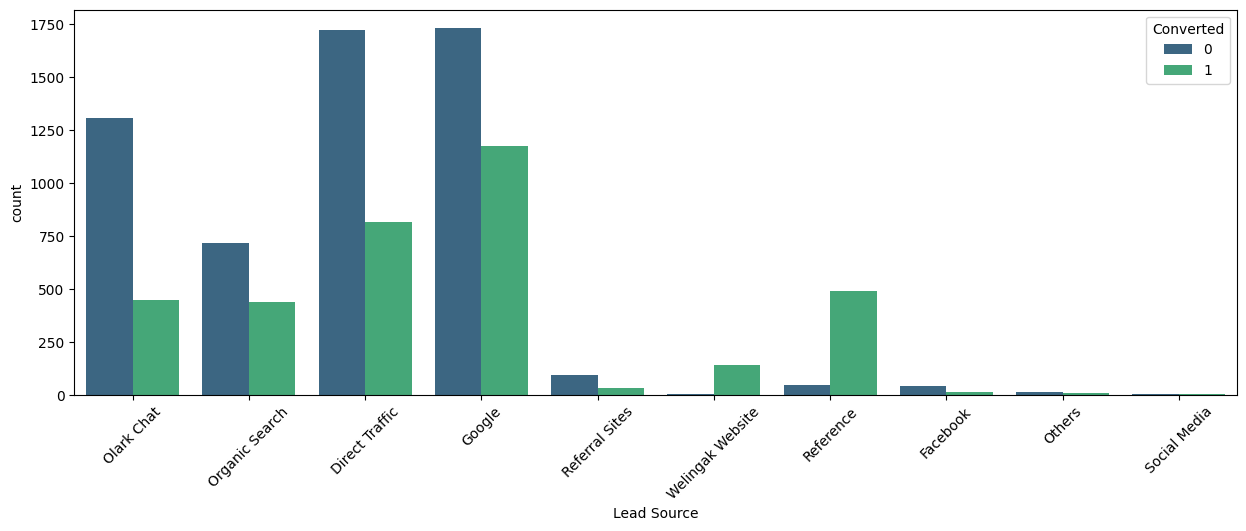

In [68]:
#visualizing count of Lead Source Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Lead Source', hue='Converted' , data =leads_df , palette = 'viridis')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

Inference:Maximum Leads are generated by Google and Direct Traffic.
Conversion rate of Reference leads and Welinkgak Website leads is very high.

In [69]:
#checking value counts of Country column

leads_df['Country'].value_counts(dropna=False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [70]:
#Imputing missing values in Country column with "'not provided"
leads_df['Country'] = leads_df['Country'].replace(np.nan,'not provided')

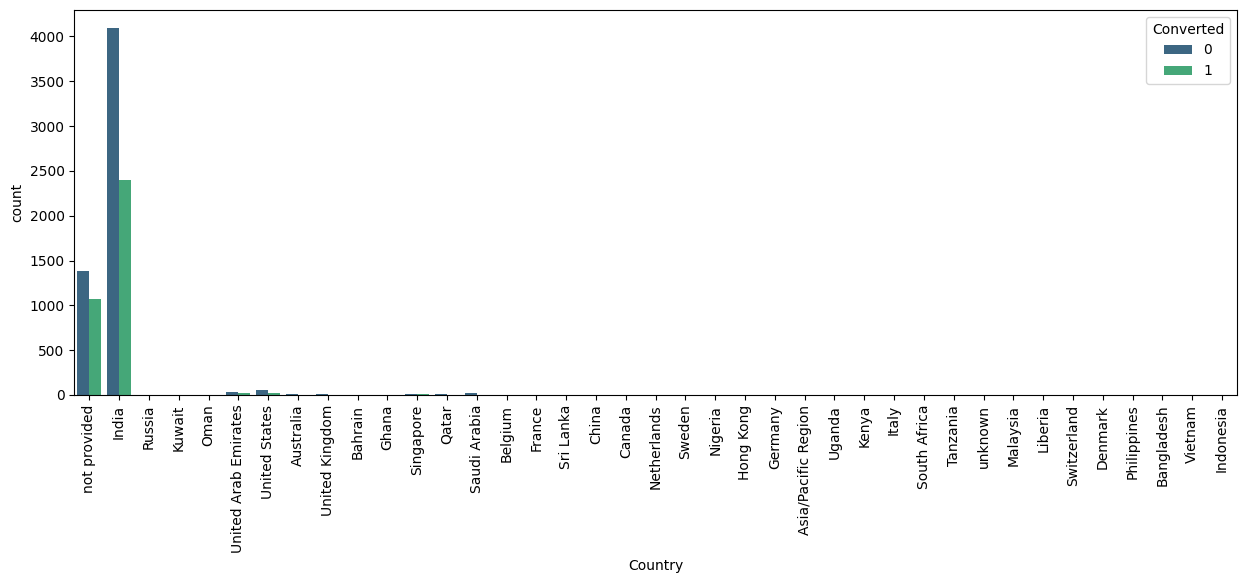

In [71]:
# Visualizing Country variable after imputation
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Country', hue='Converted' , data =leads_df , palette = 'viridis')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [72]:
#creating a list of columns to be droppped

cols_to_drop.append('Country')

#checking out list of columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country']

In [73]:
#checking value counts of 'What is your current occupation' column
leads_df['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [74]:
#Creating new category 'Not provided'

leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan, 'Not provided')

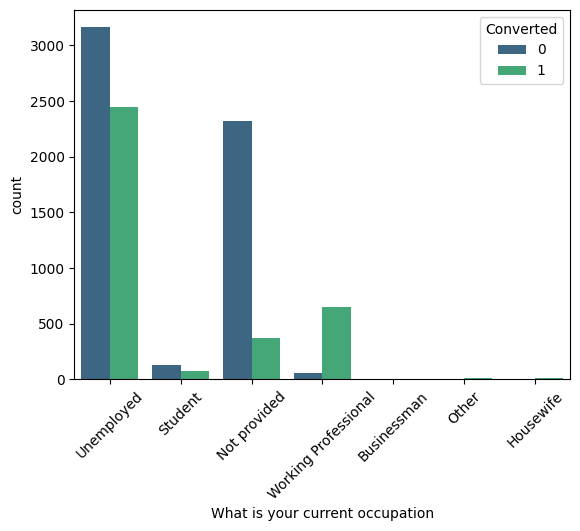

In [75]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x='What is your current occupation', hue='Converted' , data = leads_df , palette = 'viridis')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

Inference:The highest number of leads that were generated were those that were unemployed. On the other hand, the conversion rate was very high for working professionals.

In [76]:
#checking value counts of 'What matters most to you in choosing a course'

leads_df['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [77]:
leads_df['What matters most to you in choosing a course'] = leads_df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

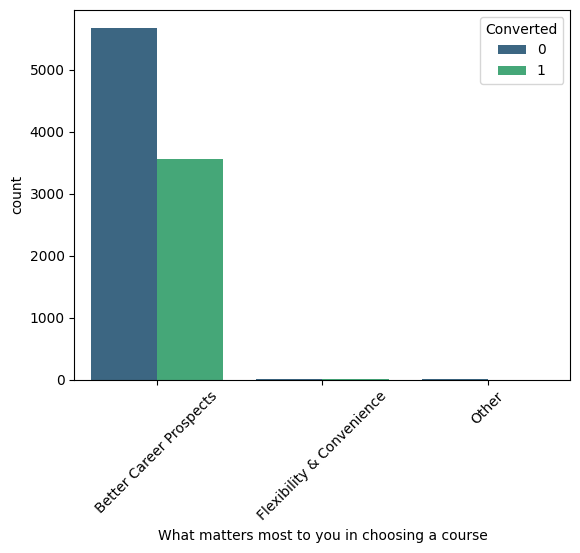

In [78]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x= 'What matters most to you in choosing a course', hue='Converted' , data = leads_df , palette = 'viridis')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

This column spread of variance is very low , hence it can be dropped.

In [79]:
# Append 'What matters most to you in choosing a course'to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course']

In [80]:
#checking value counts of Last Activity
leads_df['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [81]:
#replacing Nan Values with mode value "Email Opened"

leads_df['Last Activity'] = leads_df['Last Activity'].replace(np.nan,'Email Opened')

In [82]:
#combining low frequency values
leads_df['Last Activity'] = leads_df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                       'Had a Phone Conversation', 
                                                       'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

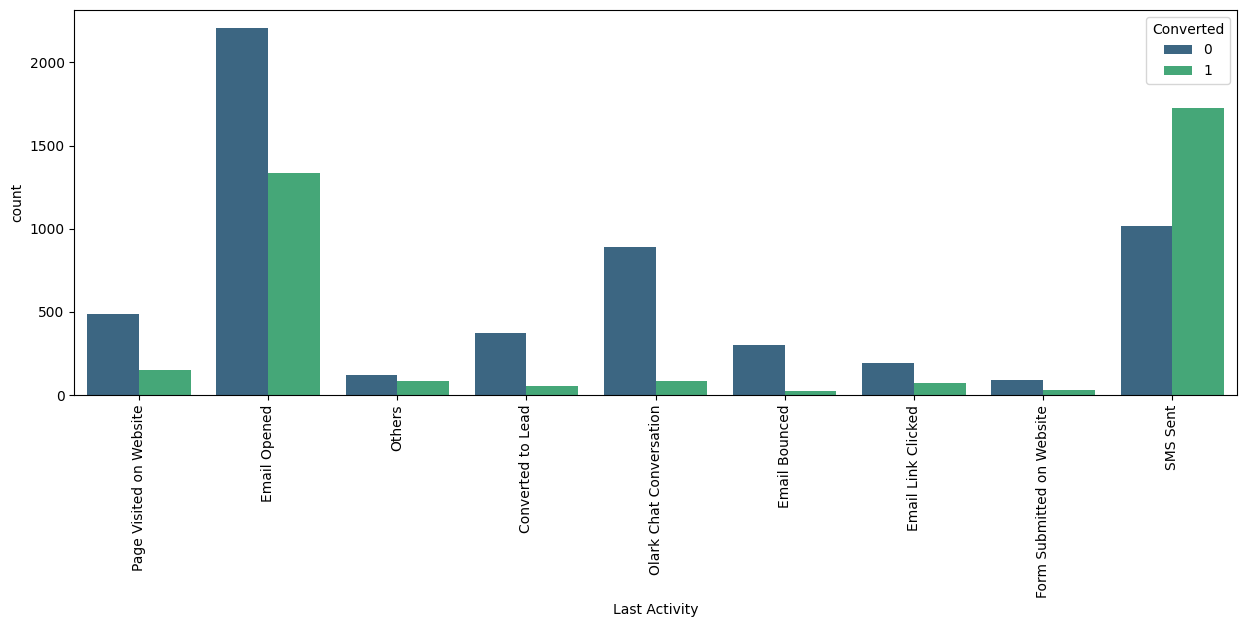

In [83]:
#visualizing count of Last Activity Variable 

plt.figure(figsize=(15,5))
s1=sns.countplot(x='Last Activity', hue='Converted' , data = leads_df , palette = 'viridis')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [84]:
# Append 'Last Activity' to the cols_to_drop List it is a X-education's sales team generated data
cols_to_drop.append('Last Activity')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity']

In [85]:
#Check the Null Values in All Columns after imputation:
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [86]:
# Remaining missing values percentage is less than 2%, we can drop those rows without affecting the data
leads_df = leads_df.dropna()

In [87]:
leads_df.shape

(9103, 25)

In [88]:
#Checking percentage of Null Values in All Columns:
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

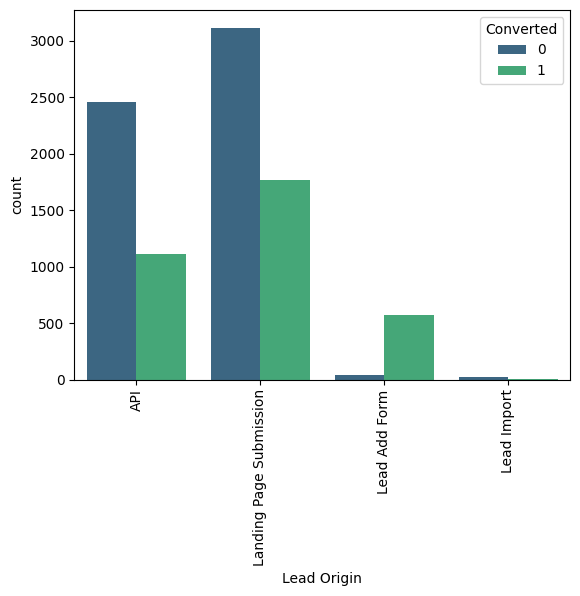

In [89]:
s1=sns.countplot(x='Lead Origin', hue='Converted' , data = leads_df , palette = 'viridis')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

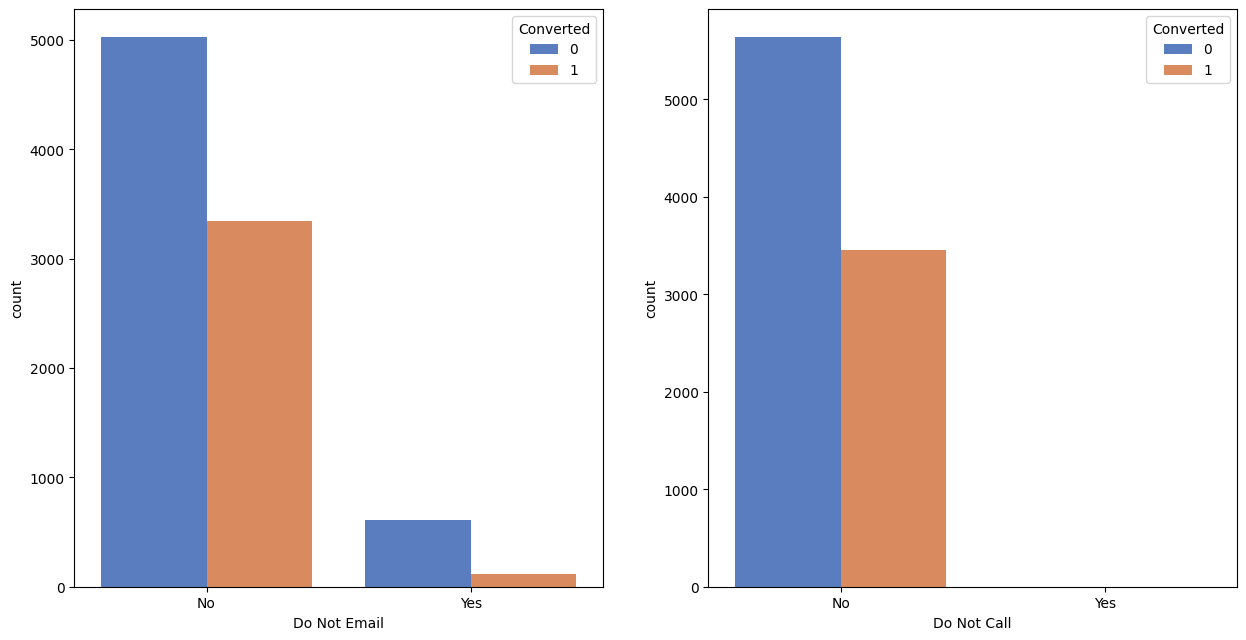

In [94]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads_df, ax = axs[0],palette = 'muted')
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads_df, ax = axs[1],palette = 'muted')
plt.show()

In [95]:
# Append 'Do Not Call' to the cols_to_drop List
cols_to_drop.append('Do Not Call')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Do Not Call',
 'Do Not Call']

In [96]:
#checking value counts of last Notable Activity
leads_df['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Others                      160
Name: count, dtype: int64

In [97]:
#clubbing lower frequency values

leads_df['Last Notable Activity'] = leads_df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')

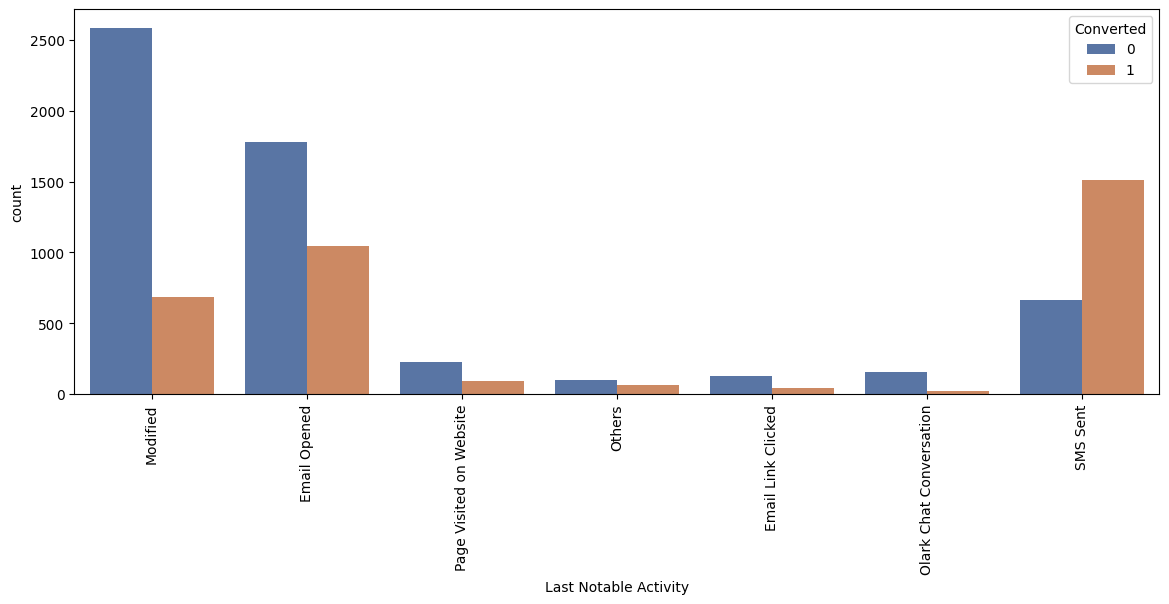

In [98]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads_df , palette = 'deep')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

The optimal number of leads that were generated was having the last activity as an email was opened. But the conversion rate was not good.
The high conversion rate was also observed with the sending of SMS as the last action.


In [99]:
# Append 'Last Notable Activity'to the cols_to_drop List as this is a sales team generated data
cols_to_drop.append('Last Notable Activity')

In [100]:
# checking final list of columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Do Not Call',
 'Do Not Call',
 'Last Notable Activity']

In [101]:
#dropping columns
leads = leads_df.drop(cols_to_drop,axis=1)

#checking info of dataset for remaining columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9103 non-null   object 
 1   Lead Source                      9103 non-null   object 
 2   Do Not Email                     9103 non-null   object 
 3   Converted                        9103 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9103 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   What is your current occupation  9103 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 640.1+ KB


In [102]:
#checking dataset
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,No,0,0.0,0,0.0,Unemployed
1,API,Organic Search,No,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Unemployed


In [103]:
leads.shape

(9103, 8)

### <font color =red>Numerical Attributes Analysis:</font>

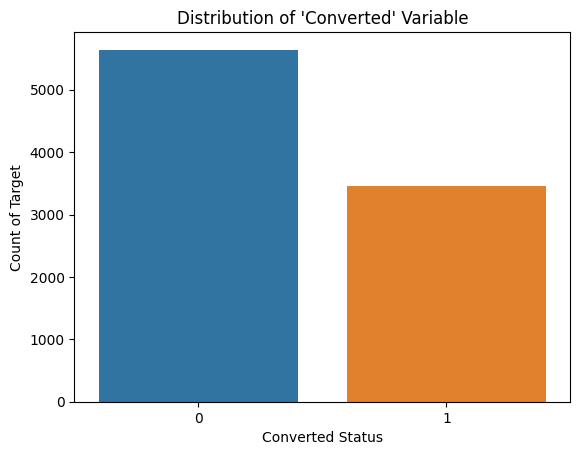

In [104]:
#Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
#Visualizing Distribution of 'Converted' Variable

# Assuming 'Converted' is the correct column name in your DataFrame
#converted_df=sns.
sns.countplot(leads,x="Converted")
plt.xlabel("Converted Status")
plt.ylabel("Count of Target")
plt.title("Distribution of 'Converted' Variable")
plt.show()

In [105]:
# Finding out conversion rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

38.02043282434362

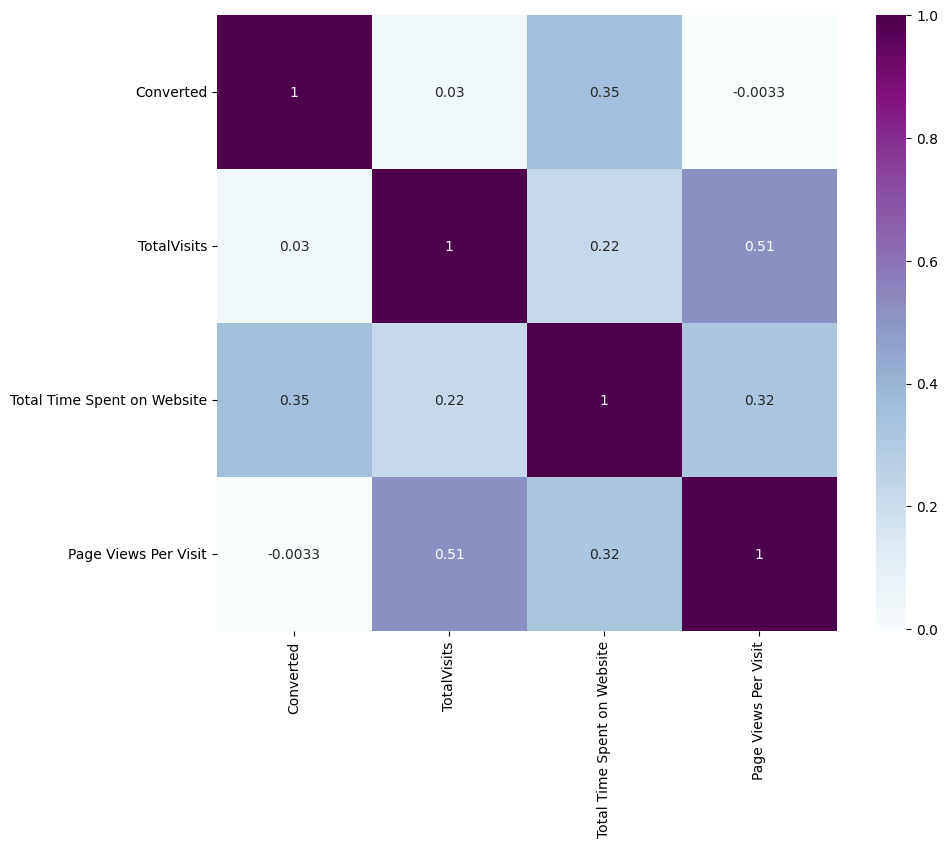

In [110]:
numeric_lead_df=leads.drop(['Lead Origin', 'Lead Source','Do Not Email','What is your current occupation'], axis=1)
#Checking correlations of numeric values using heatmap

# Size of the figure
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(numeric_lead_df.corr(), cmap="BuPu", annot=True)
plt.show()

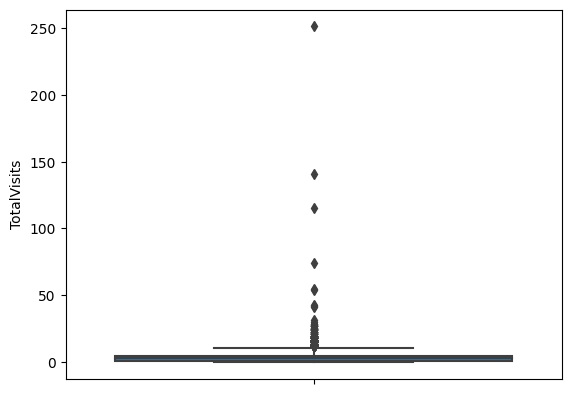

In [111]:
#visualizing spread of variable Total Visits

sns.boxplot(y=leads['TotalVisits'])
plt.show()

There are lots of outliers can be seen in "Total Visit"

In [112]:
#checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

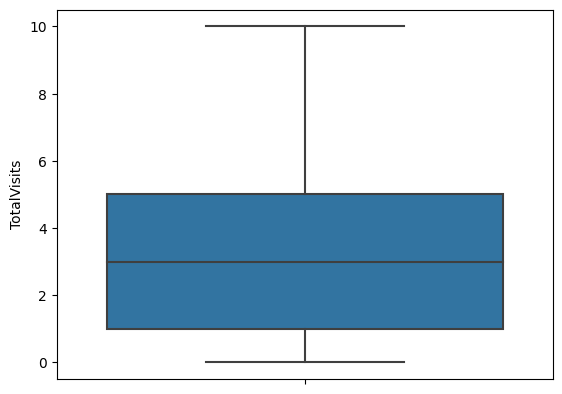

In [113]:
#Outlier Treatment: capping the outliers to 95% value for analysis

percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['TotalVisits'])
plt.show()

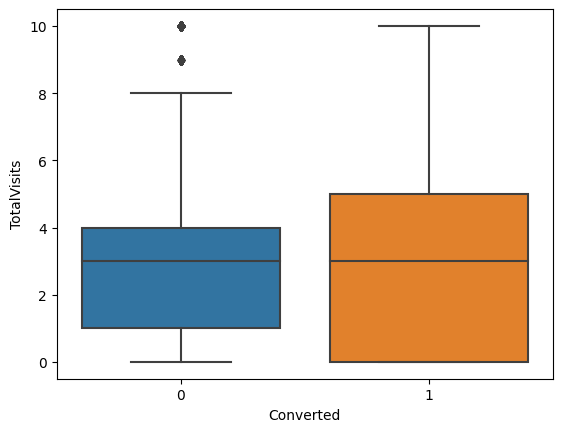

In [114]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

In [115]:
#checking percentiles for "Total Time Spent on Website"

leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
5%          0.000000
25%         9.000000
50%       244.000000
75%       919.500000
90%      1372.000000
95%      1556.900000
99%      1838.960000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

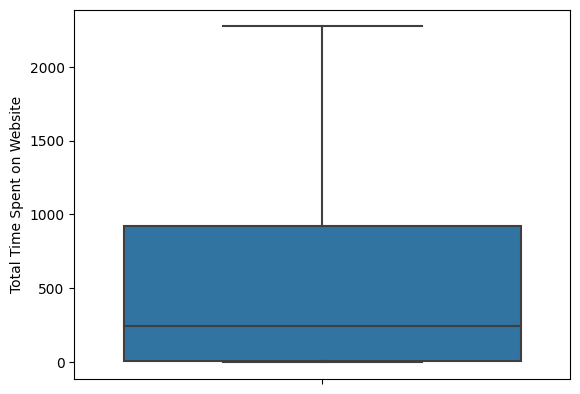

In [116]:
#visualizing spread of variable 'Total Time Spent on Website'
sns.boxplot(y = leads['Total Time Spent on Website'])
plt.show()

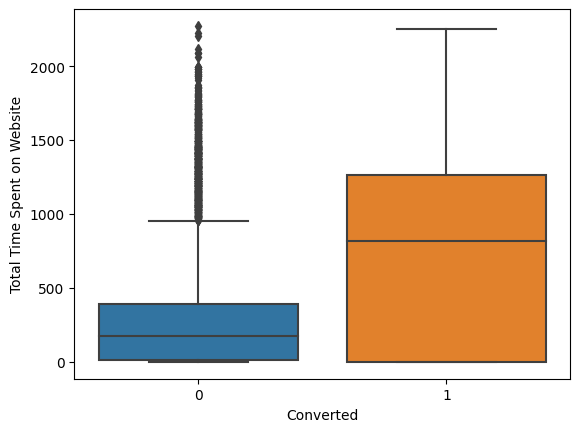

In [117]:
# Visualizing 'Total Time Spent on Website' w.r.t Target Variable 'converted'
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)
plt.show()

In [118]:
leads['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

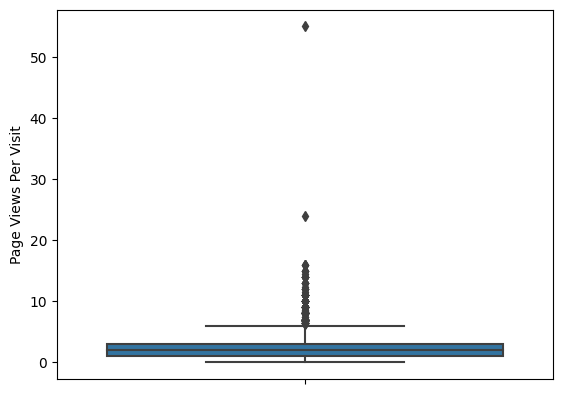

In [119]:
#visualizing spread of variable 'Page Views Per Visit'
sns.boxplot(y =leads['Page Views Per Visit'])
plt.show()

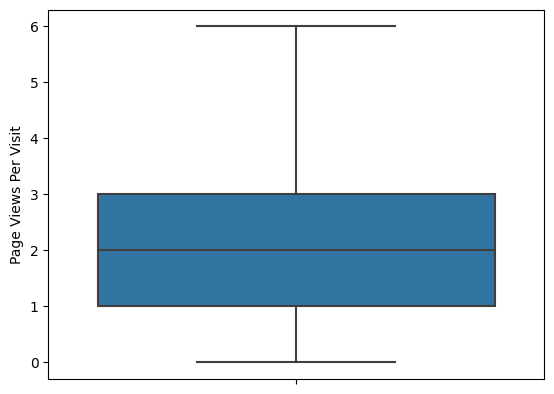

In [120]:
#Outlier Treatment: capping the outliers to 95% value for analysis
percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

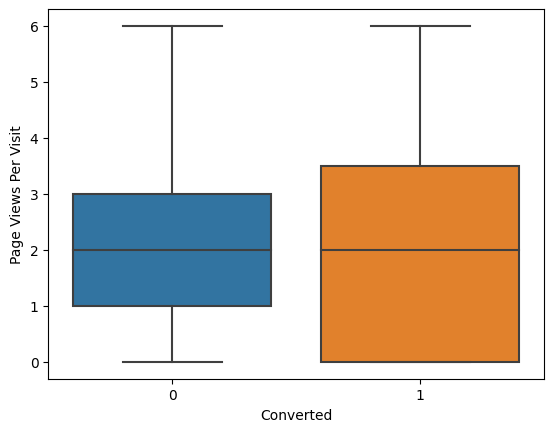

In [121]:
#visualizing 'Page Views Per Visit' w.r.t Target variable 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.show()

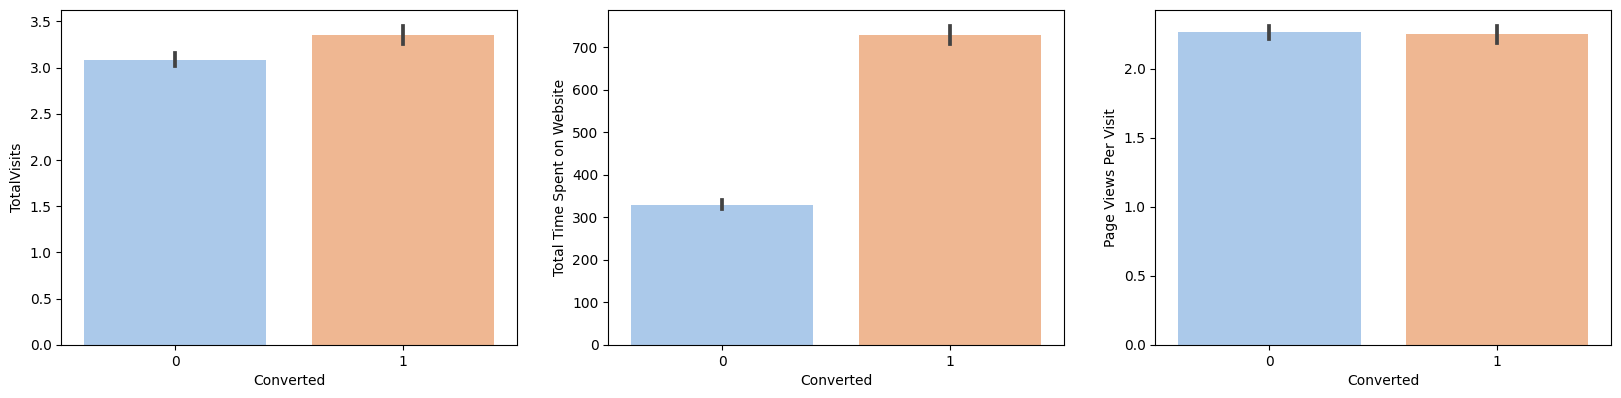

In [122]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='pastel', data = leads)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='pastel', data = leads)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='pastel', data = leads)
plt.show()

## <b><font color= red size =4> Data Preparation</font></b>

In [123]:
# List of variables to map

varlist =  ['Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [124]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed


In [125]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9103 non-null   object 
 1   Lead Source                      9103 non-null   object 
 2   Do Not Email                     9103 non-null   int64  
 3   Converted                        9103 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9103 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   What is your current occupation  9103 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 640.1+ KB


<b><font color= blue size =3>Dummy Variable Creation:</font></b>

In [126]:
#getting a list of categorical columns foy creating dummy

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'What is your current occupation'], dtype='object')

In [127]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads[['Lead Origin']], drop_first=True)
leads = pd.concat([leads,dummy],axis=1)



dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], axis=1)
leads = pd.concat([leads, dummy], axis = 1)


dummy = pd.get_dummies(leads['What is your current occupation'], prefix  = 'What is your current occupation')
dummy = dummy.drop(['What is your current occupation_Not provided'],axis= 1)
leads = pd.concat([leads, dummy], axis = 1)


In [128]:
#dropping the original columns after dummy variable creation

leads.drop(cat_cols,axis=1,inplace = True)

In [129]:
#checking dataset after dummy variable creation
leads=leads.astype('int64')
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,5,674,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,2,1532,2,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,305,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,2,1428,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


<b><font color= blue size =4>Test-Train Split</font></b>

In [130]:
#importing library for splitting dataset
from sklearn.model_selection import train_test_split

In [131]:
# Putting feature variable to X
X=leads.drop('Converted', axis=1)

#checking head of X
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,5,674,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2,1532,2,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,305,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,2,1428,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [132]:
# Putting response variable to y
y = leads['Converted']

#checking head of y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [133]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

<b><font color= blue size =4>Feature Scaling</font></b>

In [137]:
#importing library for feature scaling
from sklearn.preprocessing import MinMaxScaler

In [139]:
#scaling of features
scaler = MinMaxScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#checking X-train dataset after scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
7962,0.0,0.3,0.570794,0.166667,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5520,0.0,0.7,0.026631,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1962,0.0,0.5,0.075011,0.333333,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1566,0.0,1.0,0.550821,0.500000,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9170,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [140]:
## Checking the conversion rate from 'converted' column as it denotes the target variable

(sum(y)/len(y.index))*100

38.02043282434362

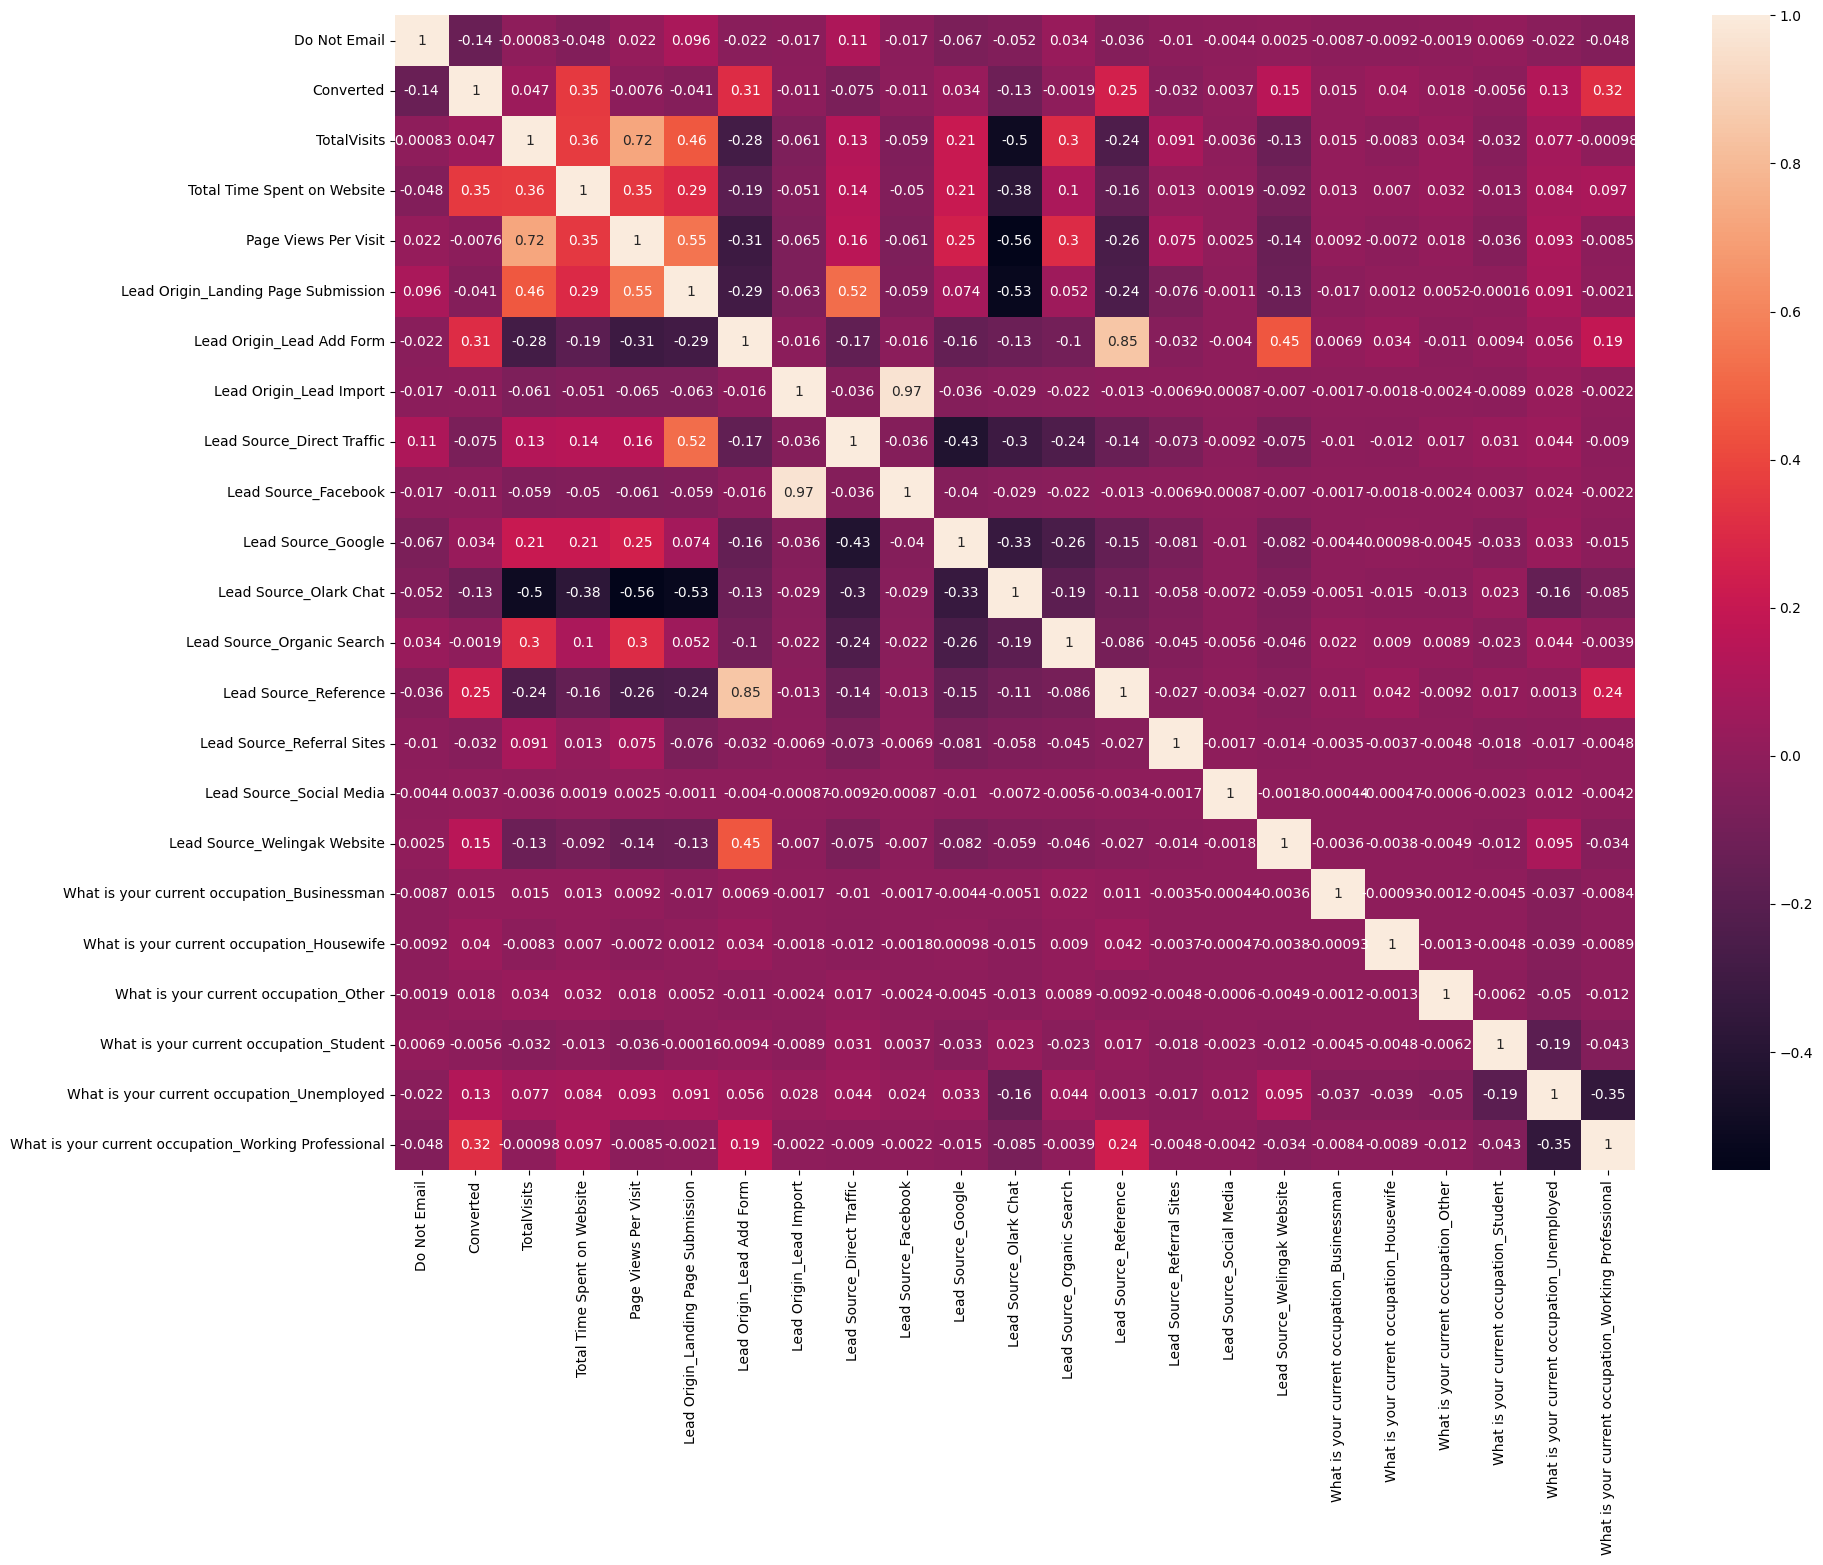

In [141]:
# Let's see the correlation matrix
plt.figure(figsize = (20,15))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()


In [142]:
X_test = X_test.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],axis=1)

In [143]:
X_train = X_train.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],axis=1)

<b><font color= blue size =4>Model Building </font></b>

In [144]:
# importing necessary library
import statsmodels.api as sm

In [145]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [146]:
rfe.support_

array([ True,  True,  True, False,  True, False,  True, False,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True])

In [147]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 5),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', False, 3),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 6),
 ('Lead Source_Welingak Website', True, 1),
 ('What is your current occupation_Businessman', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1)]

In [148]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'What is your current occupation_Businessman',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [149]:
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Reference',
       'Lead Source_Social Media'],
      dtype='object')

In [150]:
#BUILDING MODEL #1

import statsmodels.api as sm

# Assuming X_train and y_train are defined
# Assuming col is a list of column names to be used in the model

# Add constant to X_train
X_train_sm = sm.add_constant(X_train[col])

# Fit logistic regression model
logm1 = sm.GLM(y_train.astype(float), X_train_sm.astype(float), family=sm.families.Binomial())
res = logm1.fit()


# Display summary
print(res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2850.6
Date:                Sat, 18 Nov 2023   Deviance:                       5701.2
Time:                        23:55:14   Pearson chi2:                 6.42e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3515
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [151]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Housewife',1)

In [152]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2860.5
Date:                Sat, 18 Nov 2023   Deviance:                       5721.0
Time:                        23:56:06   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3494
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1333      0.093    -22.935      0.000      -2.316      -1.951
Do Not Email                                            -1.2784      0.158     -8.102      0.000      -1.588      -0.969
TotalVisits                                              0.7716      0.148      5.198      0.000       0.481       1.062
Total Time Spent on Website                              4.4684      0.158     28.219      0.000       4.158       4.779
Lead Origin_Lead Add Form                                3.0743      0.226     13.628      0.000       2.632       3.516
Lead Source_Direct Traffic                              -1.2860      0.119    -10.804      0.000      -1.519      -1.053
Lead Source_Google                                      -1.0187      0.115     -8.825      0.000      -1.245      -0.792
Lead Source_Organic Search                              -1.2113      0.144     -8.437      0.000      -1.493      -0.930
Lead Source_Referral Sites                              -1.7266      0.345     -5.001      0.000      -2.403      -1.050
Lead Source_Welingak Website                             1.8513      0.750      2.469      0.014       0.381       3.321
What is your current occupation_Businessman              1.3217      1.003      1.318      0.187      -0.644       3.287
What is your current occupation_Other                    1.2340      0.635      1.942      0.052      -0.011       2.479
What is your current occupation_Student                  1.1611      0.227      5.125      0.000       0.717       1.605
What is your current occupation_Unemployed               1.2814      0.083     15.445      0.000       1.119       1.444
What is your current occupation_Working Professional     3.7857      0.189     19.988      0.000       3.415       4.157
========================================================================================================================
"""

In [153]:
#dropping column with high p-value

col = col.drop('Lead Source_Welingak Website',1)

In [154]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2865.3
Date:                Sat, 18 Nov 2023   Deviance:                       5730.7
Time:                        23:56:39   Pearson chi2:                 6.58e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3485
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1301      0.093    -22.912      0.000      -2.312      -1.948
Do Not Email                                            -1.2541      0.155     -8.070      0.000      -1.559      -0.950
TotalVisits                                              0.7793      0.148      5.248      0.000       0.488       1.070
Total Time Spent on Website                              4.4734      0.158     28.235      0.000       4.163       4.784
Lead Origin_Lead Add Form                                3.3941      0.215     15.765      0.000       2.972       3.816
Lead Source_Direct Traffic                              -1.2964      0.119    -10.881      0.000      -1.530      -1.063
Lead Source_Google                                      -1.0315      0.116     -8.921      0.000      -1.258      -0.805
Lead Source_Organic Search                              -1.2226      0.144     -8.509      0.000      -1.504      -0.941
Lead Source_Referral Sites                              -1.7375      0.345     -5.031      0.000      -2.414      -1.061
What is your current occupation_Businessman              1.2974      1.015      1.278      0.201      -0.693       3.288
What is your current occupation_Other                    1.2327      0.635      1.940      0.052      -0.013       2.478
What is your current occupation_Student                  1.1511      0.227      5.060      0.000       0.705       1.597
What is your current occupation_Unemployed               1.2835      0.083     15.466      0.000       1.121       1.446
What is your current occupation_Working Professional     3.7792      0.190     19.937      0.000       3.408       4.151
========================================================================================================================
"""

In [155]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2865.3
Date:                Sat, 18 Nov 2023   Deviance:                       5730.7
Time:                        23:56:56   Pearson chi2:                 6.58e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3485
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1301      0.093    -22.912      0.000      -2.312      -1.948
Do Not Email                                            -1.2541      0.155     -8.070      0.000      -1.559      -0.950
TotalVisits                                              0.7793      0.148      5.248      0.000       0.488       1.070
Total Time Spent on Website                              4.4734      0.158     28.235      0.000       4.163       4.784
Lead Origin_Lead Add Form                                3.3941      0.215     15.765      0.000       2.972       3.816
Lead Source_Direct Traffic                              -1.2964      0.119    -10.881      0.000      -1.530      -1.063
Lead Source_Google                                      -1.0315      0.116     -8.921      0.000      -1.258      -0.805
Lead Source_Organic Search                              -1.2226      0.144     -8.509      0.000      -1.504      -0.941
Lead Source_Referral Sites                              -1.7375      0.345     -5.031      0.000      -2.414      -1.061
What is your current occupation_Businessman              1.2974      1.015      1.278      0.201      -0.693       3.288
What is your current occupation_Other                    1.2327      0.635      1.940      0.052      -0.013       2.478
What is your current occupation_Student                  1.1511      0.227      5.060      0.000       0.705       1.597
What is your current occupation_Unemployed               1.2835      0.083     15.466      0.000       1.121       1.446
What is your current occupation_Working Professional     3.7792      0.190     19.937      0.000       3.408       4.151
========================================================================================================================
"""

We will use the Model 4 to analyze the data further. The p-values suggest that this model is stable.

In [156]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,3.90
5,Lead Source_Google,3.02
4,Lead Source_Direct Traffic,2.67
11,What is your current occupation_Unemployed,2.61
2,Total Time Spent on Website,2.33
6,Lead Source_Organic Search,2.10
12,What is your current occupation_Working Profes...,1.30
3,Lead Origin_Lead Add Form,1.29
0,Do Not Email,1.11
7,Lead Source_Referral Sites,1.11


Since all the variables have good VIF values, we can proceed with our predictions using this model.

<b><font color= blue size =4>Predicting a Train model</font></b>

In [158]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.712803
5520    0.185668
1962    0.239955
1566    0.979385
9170    0.300138
5097    0.106206
8954    0.256751
309     0.275621
5519    0.106206
1050    0.608251
dtype: float64

In [159]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.71280309, 0.18566758, 0.23995501, 0.97938489, 0.30013838,
       0.10620601, 0.25675069, 0.27562095, 0.10620601, 0.60825093])

In [160]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.712803,7962
1,0,0.185668,5520
2,0,0.239955,1962
3,1,0.979385,1566
4,0,0.300138,9170


In [161]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.712803,7962,1
1,0,0.185668,5520,0
2,0,0.239955,1962,0
3,1,0.979385,1566,1
4,0,0.300138,9170,0


In [167]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3533  420]
 [ 851 1568]]


In [168]:
# the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8005335844318895


In [169]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [170]:
# the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6482017362546507

In [171]:
# specificity
TN / float(TN+FP)

0.8937515810776625

In [172]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.10624841892233747


In [173]:
# positive predictive value 
print (TP / float(TP+FP))

0.7887323943661971


In [174]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8058850364963503


### <font color = maroon>PLOTTING ROC CURVE

In [175]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [177]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

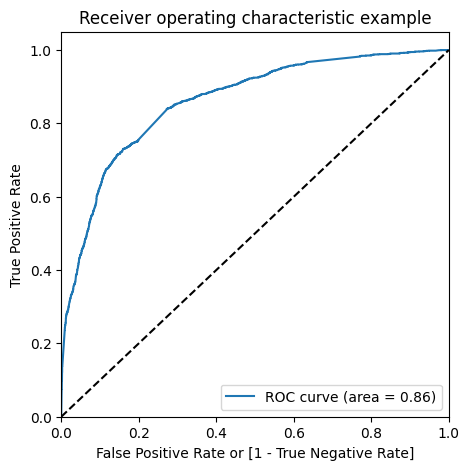

In [178]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be around one. We are currently getting an excellent value of 0.86. This indicates that the model has a good predictive mode.

### <font color = maroon>Finding Optimal Cutoff Point

In [179]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.712803,7962,1,1,1,1,1,1,1,1,1,0,0
1,0,0.185668,5520,0,1,1,0,0,0,0,0,0,0,0
2,0,0.239955,1962,0,1,1,1,0,0,0,0,0,0,0
3,1,0.979385,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.300138,9170,0,1,1,1,1,0,0,0,0,0,0


In [180]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.513967  0.984291  0.226157
0.2   0.2  0.686755  0.905333  0.552998
0.3   0.3  0.769617  0.836709  0.728561
0.4   0.4  0.802260  0.705250  0.861624
0.5   0.5  0.800534  0.648202  0.893752
0.6   0.6  0.782172  0.563043  0.916266
0.7   0.7  0.762398  0.470856  0.940804
0.8   0.8  0.734620  0.351798  0.968884
0.9   0.9  0.709510  0.252584  0.989122


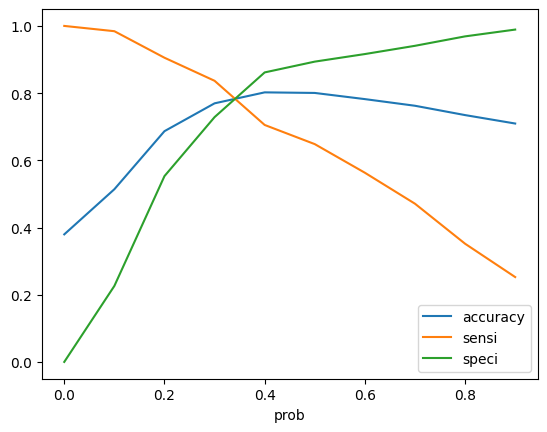

In [181]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

0.3 is the optimum point to take it as a cutoff probability

In [182]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.712803,7962,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.185668,5520,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.239955,1962,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.979385,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.300138,9170,0,1,1,1,1,0,0,0,0,0,0,1


In [183]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.712803,7962,1,71
1,0,0.185668,5520,0,19
2,0,0.239955,1962,0,24
3,1,0.979385,1566,1,98
4,0,0.300138,9170,1,30


In [184]:


# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

final_Predicted
1    2024
0     395
Name: count, dtype: int64

In [185]:
# The precentage of final_predicted conversions

2005/float(2005+414)

0.8288548987184787

The final prediction of the model is that the conversion rate will be at 83%. This is in line with the requirements of the X Educations CEO.

In [186]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7696170747018205

In [187]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2880, 1073],
       [ 395, 2024]])

In [188]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [189]:
# The sensitivity of our logistic regression model
TP / float(TP+FN)

0.836709384042993

In [190]:
# Calculate specificity
TN / float(TN+FP)

0.7285605868960283


<b><font size=3>Inference:</font></b><br>
The model is performing well according to the inference shown above. The value of the ROC curve is 0.86. For the Train Data, we have the following values.
<ul>
    <li>Accuracy : 76.96%</li>
    <li>Sensitivity :83.67%</li>
    <li>Specificity : 72%</li></ul>
    
The other statistical indicators shown below indicate the False Positive Rate, Negative Predictive Value, Precision, and Recall.

In [191]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.2714394131039717


In [192]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6535356796900226


In [193]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8793893129770992


<b><font color= blue size =3>Precision and Recall</font></b>

In [194]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[2880, 1073],
       [ 395, 2024]])

In [195]:
#Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6535356796900226

In [197]:
#Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.836709384042993

In [198]:
from sklearn.metrics import precision_score, recall_score

In [199]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.6535356796900226

In [200]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.836709384042993

<b><font color= blue size =3>Precision and Recall Trade-off</font></b>

In [201]:
# importing precision recall curve from sklearn library
from sklearn.metrics import precision_recall_curve

In [202]:
# Creating precision recall curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

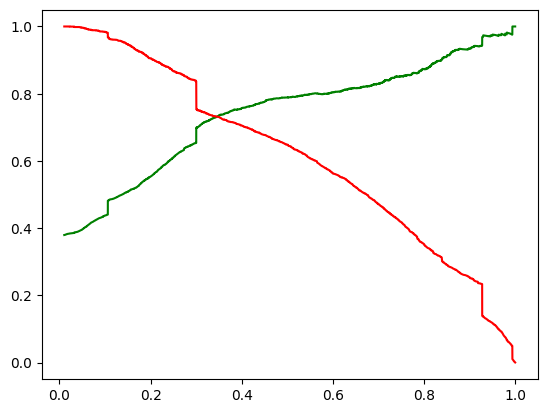

In [203]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## <font color =maroon>Predictions on  the test set

In [204]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3504,0.0,0.3,0.186620,0.500000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4050,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7201,1.0,0.2,0.313380,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1196,0.0,0.4,0.186180,0.666667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8219,0.0,0.7,0.108715,0.166667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [205]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,What is your current occupation_Businessman,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3504,0.0,0.3,0.186620,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4050,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7201,1.0,0.2,0.313380,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1196,0.0,0.4,0.186180,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8219,0.0,0.7,0.108715,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [206]:
X_test_sm = sm.add_constant(X_test)

In [207]:
X_test_sm.shape

(2731, 14)

In [208]:
y_test_pred = res.predict(X_test_sm)   

In [209]:
y_test_pred[:10]

3504    0.268806
4050    0.927403
7201    0.137117
1196    0.283994
8219    0.247643
8747    0.106206
9048    0.292953
6524    0.200431
7693    0.049648
8187    0.927403
dtype: float64

In [210]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [211]:
# Let's see the head
y_pred_1.head()

,0
3504,0.268806
4050,0.927403
7201,0.137117
1196,0.283994
8219,0.247643


In [212]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [213]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [214]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [215]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [216]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.268806
1,1,4050,0.927403
2,0,7201,0.137117
3,0,1196,0.283994
4,1,8219,0.247643


In [217]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})


In [218]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3504,0.268806
1,1,4050,0.927403
2,0,7201,0.137117
3,0,1196,0.283994
4,1,8219,0.247643


In [219]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [220]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3504,0,0.268806,27
1,4050,1,0.927403,93
2,7201,0,0.137117,14
3,1196,0,0.283994,28
4,8219,1,0.247643,25


In [221]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [222]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,3504,0,0.268806,27,0
1,4050,1,0.927403,93,1
2,7201,0,0.137117,14,0
3,1196,0,0.283994,28,0
4,8219,1,0.247643,25,0


In [223]:
# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

final_Predicted
1    868
0    174
Name: count, dtype: int64

In [224]:
# check the precentage of final_predicted conversions on test data

865/float(865+177)

0.8301343570057581

The final prediction of conversions have a target rate of 83% (same as predictions made on training data set)

In [225]:
 #Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.775906261442695

In [226]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1251,  438],
       [ 174,  868]])

In [227]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [228]:
#the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8330134357005758

In [229]:
#calculate specificity
TN / float(TN+FP)

0.7406749555950266

<b><font color = red size =3>Precision and Recall metrics for the test set

In [230]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.664624808575804

In [231]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8330134357005758

<b><font size=3>Inference:</font></b><br>
Finding After running the model on the Test Data:
<ul>
<li>Accuracy : 77.59%</li>
<li>Sensitivity :83.30%</li>
<li>Specificity : 74.06%</li>

<b><font size =4>Conclusion:</font></b>


- We have also performed various other tests such as recall metrics and sensitivity-specificity. For the final prediction, we have decided to use the optimal cutoff based on these two factors.
- The sensitivity, specificity, and accuracy values of the test set are as follows: 77%, 83%, and 74%. These are close to the values that are derived from the trained set.
- The lead score that was obtained from the trained data showed that the predicted model had a conversion rate of around 80%.
- Overall, the model seems to be good.
  

